In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Artificial Neural Network

### Importing the libraries

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.9.2'

## Part 1 - Data Preprocessing

### Importing the dataset

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/exercise-3/Model Performance Evaluation/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Encoding categorical data

Label Encoding the "Gender" column

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [6]:
print(X[:, 2])

[0 0 0 ... 0 1 0]


One Hot Encoding the "Geography" column

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [8]:
print(X[:, 1])

[0.0 0.0 0.0 ... 0.0 1.0 0.0]


### Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [11]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [12]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [13]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [14]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [15]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [16]:
history = ann.fit(X_train, y_train, validation_split = 0.1, batch_size = 32, epochs = 100)

Epoch 1/100
225/225 [==============================] - 1s 3ms/step - loss: 0.5685 - accuracy: 0.7418 - val_loss: 0.4921 - val_accuracy: 0.7950
Epoch 2/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.7961 - val_loss: 0.4577 - val_accuracy: 0.7950
Epoch 3/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.7961 - val_loss: 0.4416 - val_accuracy: 0.7950
Epoch 4/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.7961 - val_loss: 0.4325 - val_accuracy: 0.7950
Epoch 5/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.7961 - val_loss: 0.4263 - val_accuracy: 0.7950
Epoch 6/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.7961 - val_loss: 0.4231 - val_accuracy: 0.7950
Epoch 7/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.8001 - val_loss: 0.4198 - val_accuracy: 0.8125

# Visualization of the Loss training VS validation

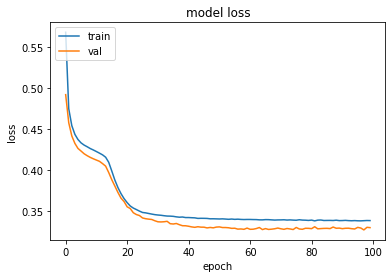

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Visualization of the Accuracy training VS validation

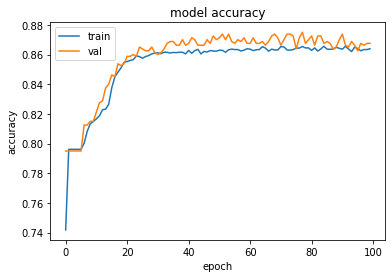

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [21]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.8)

63/63 [==============================] - 1s 3ms/step


## Model Performance Evaluation

Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report, balanced_accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n\n{cm}')

Confusion Matrix:

[[1585   10]
 [ 290  115]]


Confusion Matrix Plot

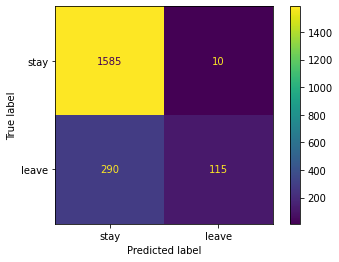

In [27]:
cmd = ConfusionMatrixDisplay(cm, display_labels=['stay', 'leave'])
cmd.plot()

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy*100)}%')

Accuracy: 85%


TPR, TNR, FPR and FNR

In [39]:
tn, fp, fn, tp = cm.ravel()
TPR = tp/(tp+fn)
TNR = tn/(tn+fp)
FPR = fp/(fp+tn)
FNR = fn/(fn+tp)

print(f'TPR: {round(TPR*100)}%\n'
      f'TNR: {round(TNR*100)}%\n'
      f'FPR: {round(FPR*100)}%\n'
      f'FNR: {round(FNR*100)}%\n')


TPR: 28%
TNR: 99%
FPR: 1%
FNR: 72%



Balanced Accuracy

In [38]:
bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy: {round(bal_acc*100)}%')

Balanced Accuracy: 64%


Classification Report - Precision, Recall, F1 Score and Accuracy

In [33]:
print(classification_report(y_test, y_pred, target_names=['stay', 'leave']))

              precision    recall  f1-score   support

        stay       0.85      0.99      0.91      1595
       leave       0.92      0.28      0.43       405

    accuracy                           0.85      2000
   macro avg       0.88      0.64      0.67      2000
weighted avg       0.86      0.85      0.82      2000

